<a href="https://colab.research.google.com/github/SEC-API-io/sec-api-cookbook/blob/main/notebooks/sec-litigation-releases/sec_litigation_releases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing SEC Litigation Releases in Python

In this guide, we will analyze all SEC litigation releases from 1995 to 2025 obtained from the [litigation database](https://sec-api.io/docs/sec-litigation-releases-database-api). The dataset contains information about all litigation releases published by the U.S. Securities and Exchange Commission (SEC) from 1995 to 2025 and includes information about the defendants, charges, penalty amounts, and other relevant details.

Our analysis will focus on several key aspects of the dataset, including:

- The number of litigation releases published each year and month
- Litigations by settlement type and agreement to pay penalties
- Penalty amounts by year
- Top 10 penalties by amount
- Categories of requested reliefs, violations, and more

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style

style.use("default")

params = {
    "axes.labelsize": 8,
    "font.size": 8,
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "text.usetex": False,
    "font.family": "sans-serif",
    "axes.spines.top": False,
    "axes.spines.right": False,
    "grid.color": "grey",
    "axes.grid": True,
    "axes.grid.axis": "y",
    "axes.grid.axis": "x",
    "grid.alpha": 0.5,
    "grid.linestyle": ":",
}

plt.rcParams.update(params)

For the sake of brevity, we downloaded all SEC litigation data from 1995 to 2025 and saved it as a JSONL file. We will load this data into a pandas DataFrame and perform our analysis using Python.

In [ ]:
df = pd.read_json(
    # TODO: replace with your path
    "/path/to/sec-litigation-releases.jsonl",
    lines=True,
)

In [ ]:
# convert "releasedAt" to datetime and to EST timezone
df["releasedAt"] = pd.to_datetime(df["releasedAt"], utc=True)
df["releasedAt"] = df["releasedAt"].dt.tz_convert("US/Eastern")
df["releasedAtYear"] = df["releasedAt"].dt.year
df["releasedAtMonth"] = df["releasedAt"].dt.month
df["releasedAtYearMonth"] = df["releasedAt"].dt.to_period("M")
# Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday
df["releasedAtDay"] = df["releasedAt"].dt.day_name()
df["hasAgreedToSettlement"] = df["hasAgreedToSettlement"].astype(bool)
df["hasAgreedToPayPenalty"] = df["hasAgreedToPayPenalty"].astype(bool)
df['caseCitation'] = df['caseCitations'].map(lambda x: x[0] if x else None)

print(f"Loaded {len(df):,.0f} SEC litigation releases from 1995 to 2025\n")
print(df.info())

Loaded 11,536 SEC litigation releases from 1995 to 2025

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11536 entries, 0 to 11535
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype                     
---  ------                    --------------  -----                     
 0   id                        11536 non-null  object                    
 1   releaseNo                 11536 non-null  object                    
 2   releasedAt                11536 non-null  datetime64[ns, US/Eastern]
 3   url                       11536 non-null  object                    
 4   title                     11535 non-null  object                    
 5   subTitle                  11536 non-null  object                    
 6   caseCitations             11536 non-null  object                    
 7   resources                 11536 non-null  object                    
 8   summary                   11524 non-null  object                    
 9   tags           

/var/folders/q3/bt7922t52p78qdm75h_8m5yh0000gn/T/ipykernel_39183/1704038985.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["releasedAtYearMonth"] = df["releasedAt"].dt.to_period("M")


In [ ]:
df.head()

,id,releaseNo,releasedAt,url,title,subTitle,caseCitations,resources,summary,tags,...,requestedRelief,violatedSections,investigationConductedBy,litigationLedBy,otherAgenciesInvolved,releasedAtYear,releasedAtMonth,releasedAtYearMonth,releasedAtDay,caseCitation
0,c3772c013f5a90d0c1c0170bbed8ad6a,LR-26231,2025-01-22 21:17:05-05:00,https://www.sec.gov/enforcement-litigation/lit...,Gabriel Rebeiz,SEC Charges Technical Consultant with Insider ...,[Securities and Exchange Commission v. Gabriel...,"[{'label': 'SEC Complaint', 'url': 'https://ww...",The SEC filed settled charges against Gabriel ...,[insider trading],...,"[disgorgement of profits, civil penalties, per...",[Section 10(b) of the Securities Exchange Act ...,"[Sara Kalin, John Rymas, Stephen Kam]","[Diana Tani, Joseph Sansone]",[{'name': 'Financial Industry Regulatory Autho...,2025,1,2025-01,Wednesday,Securities and Exchange Commission v. Gabriel ...
1,860c50b5c1bfa963e68568f2b6008ba4,LR-26230,2025-01-21 15:00:18-05:00,https://www.sec.gov/enforcement-litigation/lit...,"Old South Trading Co., LLC; Brendan H. Church;...",SEC Charges Father and Son for $25.8 Million U...,[Securities and Exchange Commission v. Old Sou...,"[{'label': 'SEC Complaint', 'url': 'https://ww...","The SEC has charged Old South Trading Co., LLC...","[unregistered securities offering, unregistere...",...,"[injunctive relief, disgorgement of allegedly ...",[Sections 5(a) and (c) of the Securities Act o...,"[Jonathan Shapiro, Andrew Elliott, Margaret Vi...",[Dean Conway],[],2025,1,2025-01,Tuesday,Securities and Exchange Commission v. Old Sout...
2,1485373724567b64d7cee1c8ce853fe3,LR-26229,2025-01-18 19:09:46-05:00,https://www.sec.gov/enforcement-litigation/lit...,"Nova Labs, Inc.","SEC Charges Nova Labs, Inc. with Fraud and Reg...",[Securities and Exchange Commission v. Nova La...,"[{'label': 'SEC Complaint', 'url': 'https://ww...","The SEC has charged Nova Labs, Inc. with fraud...","[fraud, registration violations, crypto]",...,"[permanent and conduct-based injunctions, disg...","[Sections 5(a), 5(c), and 17(a)(2) of the Secu...","[Emmy E. Rush, Christopher Colorado, Kim Han, ...","[Emmy E. Rush, Christopher Colorado, Peter Man...",[],2025,1,2025-01,Saturday,Securities and Exchange Commission v. Nova Lab...
3,35ebfbcaf74cef9401e78f8e92b934e6,LR-26228,2025-01-17 22:20:10-05:00,https://www.sec.gov/enforcement-litigation/lit...,Arete Wealth Management LLC; Arete Wealth Advi...,SEC Charges Arete Wealth Broker-Dealer and Adv...,[Securities and Exchange Commission v. Arete W...,"[{'label': 'SEC Complaint', 'url': 'https://ww...",The SEC has charged Arete Wealth Management LL...,"[fraud, illegal securities offering, recordkee...",...,"[permanent injunctions, civil penalties, condu...",[Sections 206(1) and 206(2) of the Investment ...,"[Theresa H. Gue, Austin Thompson, Christopher ...","[Oren Gleich, Preethi Krishnamurthy]",[{'name': 'U.S. Attorney's Office for the East...,2025,1,2025-01,Friday,Securities and Exchange Commission v. Arete We...
4,60cabddfdd7abcf4c1da9bffebc55a1e,LR-26227,2025-01-17 21:56:17-05:00,https://www.sec.gov/enforcement-litigation/lit...,Naufal Sanaullah,SEC Charges Fund Executive with Making False S...,[Securities and Exchange Commission v. Naufal ...,"[{'label': 'SEC Complaint', 'url': 'https://ww...",The SEC charged Naufal Sanaullah with making f...,"[disclosure fraud, securities fraud]",...,"[permanent injunctive relief, disgorgement alo...","[Section 17(a) of the Securities Act of 1933, ...","[Heather Marlow, Kimberly L. Frederick, Nichol...","[Zachary Carlyle, Gregory A. Kasper, Nicholas ...","[{'name': 'Federal Bureau of Investigation', '...",2025,1,2025-01,Friday,Securities and Exchange Commission v. Naufal S...


## Litigations by Year and Month

In [ ]:
# piv table with years = col, months = index, values = count of cases
df_year_month = df.pivot_table(
    index="releasedAtYear",
    columns="releasedAtMonth",
    values="id",
    aggfunc="count",
    fill_value=0,
)

total_col = df_year_month.sum(axis=1)
mean_col = round(df_year_month.mean(axis=1), 0)
median_col = round(df_year_month.median(axis=1), 0)

df_year_month["total"] = total_col
df_year_month["mean"] = mean_col
df_year_month["median"] = median_col

total_row = df_year_month.sum(axis=0)
mean_row = round(df_year_month.mean(axis=0), 0)
median_row = round(df_year_month.median(axis=0), 0)

df_year_month.loc["total"] = total_row
df_year_month.loc["mean"] = mean_row
df_year_month.loc["median"] = median_row

df_year_month = df_year_month.astype(int)

print("SEC Litigation Releases by Year and Month")
df_year_month

SEC Litigation Releases by Year and Month


releasedAtMonth,1,2,3,4,5,6,7,8,9,10,11,12,total,mean,median
releasedAtYear,,,,,,,,,,,,,,,
1995,0,0,0,0,0,0,0,0,23,39,36,25,123,10,0
1996,37,22,30,36,32,40,27,30,73,42,26,34,429,36,33
1997,37,32,39,46,24,20,28,39,53,27,26,29,400,33,30
1998,28,20,35,35,34,31,30,36,53,44,19,25,390,32,32
1999,38,24,31,27,40,33,24,42,52,23,31,21,386,32,31
2000,23,41,38,32,45,40,25,34,68,44,27,34,451,38,36
2001,39,35,28,32,41,36,27,30,55,49,35,41,448,37,36
2002,58,38,60,49,42,55,52,60,49,65,45,44,617,51,50
2003,48,49,49,65,41,45,60,51,64,58,40,49,619,52,49


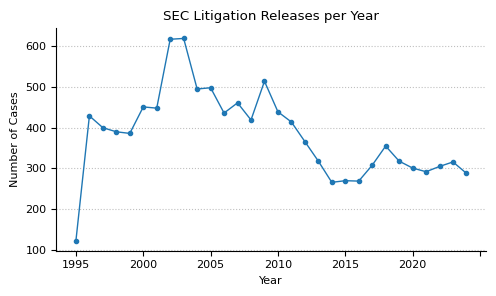

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))

df_year_month.loc[1995:2024]["total"].plot(
    kind="line",
    ax=ax,
    marker="o",
    markersize=3,
    linewidth=1,
)

ax.set_title("SEC Litigation Releases per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Cases")
plt.tight_layout()
plt.grid(axis="x")
ax.set_axisbelow(True)
plt.show()

### Litigations by Year and Settlement Type

In [ ]:
# piv table for hasAgreedToSettlement
# col = hasAgreedToSettlement (true, false), index = year, values = count of cases
df_year_settlement = df.pivot_table(
    index="releasedAtYear",
    columns="hasAgreedToSettlement",
    values="id",
    aggfunc="count",
    fill_value=0,
)

total_col = df_year_settlement.sum(axis=1)
mean_col = round(df_year_settlement.mean(axis=1), 0)
median_col = round(df_year_settlement.median(axis=1), 0)

total_row = df_year_settlement.sum(axis=0)
mean_row = round(df_year_settlement.mean(axis=0), 0)
median_row = round(df_year_settlement.median(axis=0), 0)

df_year_settlement.loc["total"] = total_row
df_year_settlement.loc["mean"] = mean_row
df_year_settlement.loc["median"] = median_row

df_year_settlement = df_year_settlement.astype(int)

df_year_settlement

hasAgreedToSettlement,False,True
releasedAtYear,,
1995,63,60
1996,215,214
1997,195,205
1998,209,181
1999,196,190
2000,239,212
2001,214,234
2002,337,280
2003,322,297


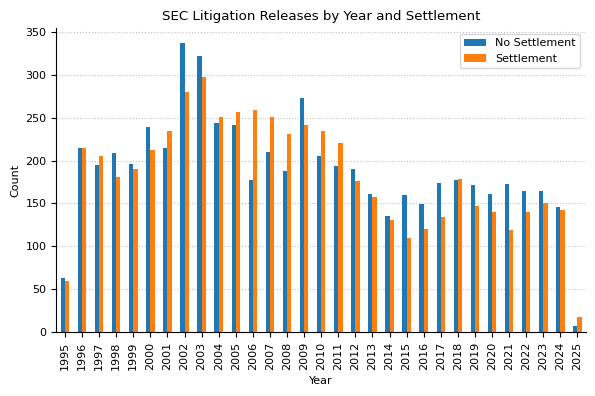

In [ ]:
# stacked bar chart for hasAgreedToSettlement
fig, ax = plt.subplots(figsize=(6, 4))

df_year_settlement.drop(["total", "mean", "median"]).plot(
    kind="bar", stacked=False, ax=ax, color=["#1f77b4", "#ff7f0e"]
)

plt.title("SEC Litigation Releases by Year and Settlement")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(["No Settlement", "Settlement"], loc="upper right")
plt.grid(axis="x")
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()

### Litigations by Year And Count of Agreements to Pay Penalties

In [ ]:
# piv table for hasAgreedToPayPenalty
# col = hasAgreedToPayPenalty (true, false), index = year, values = count of cases
df_year_penalty = df.pivot_table(
    index="releasedAtYear",
    columns="hasAgreedToPayPenalty",
    values="id",
    aggfunc="count",
    fill_value=0,
)

total_col = df_year_penalty.sum(axis=1)
mean_col = round(df_year_penalty.mean(axis=1), 0)
median_col = round(df_year_penalty.median(axis=1), 0)

total_row = df_year_penalty.sum(axis=0)
mean_row = round(df_year_penalty.mean(axis=0), 0)
median_row = round(df_year_penalty.median(axis=0), 0)

df_year_penalty.loc["total"] = total_row
df_year_penalty.loc["mean"] = mean_row
df_year_penalty.loc["median"] = median_row

df_year_penalty = df_year_penalty.astype(int)

df_year_penalty

hasAgreedToPayPenalty,False,True
releasedAtYear,,
1995,88,35
1996,296,133
1997,266,134
1998,254,136
1999,222,164
2000,285,166
2001,251,197
2002,375,242
2003,339,280


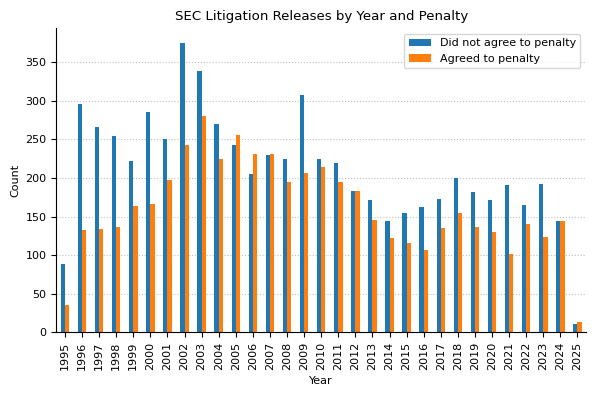

In [ ]:
# stacked bar chart for hasAgreedToSettlement
fig, ax = plt.subplots(figsize=(6, 4))

df_year_penalty.drop(["total", "mean", "median"]).plot(
    kind="bar", stacked=False, ax=ax, color=["#1f77b4", "#ff7f0e"]
)

plt.title("SEC Litigation Releases by Year and Penalty")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(["Did not agree to penalty", "Agreed to penalty"], loc="upper right")
plt.grid(axis="x")
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()

## Penalty Amount Analysis

In [ ]:
all_penalties = []
case_citations = {}

# iterate over all rows, extract penalties and append to all_penalties
for i, row in df.drop_duplicates(subset=["caseCitation"], keep="last").iterrows():
    penaltyAmounts = row["penaltyAmounts"]

    if isinstance(penaltyAmounts, list):
        for penalty in penaltyAmounts:
            if "penaltyAmount" in penalty:
                # find entity with "name" == "imposedOn"
                entity = list(filter(lambda x: x["name"] == penalty["imposedOn"], row["entities"]))
                entity_type = entity[0]["type"] if entity else None

                all_penalties.append(
                    {
                        "caseCitation": row['caseCitation'],
                        "releaseNo": row["releaseNo"],
                        "releasedAt": row["releasedAt"],
                        "releasedAtYear": row["releasedAtYear"],
                        "releasedAtMonth": row["releasedAtMonth"],
                        "amount": penalty["penaltyAmount"],
                        "imposedOn": penalty["imposedOn"],
                        "imposedOnType": entity_type,
                        "url": row["url"],
                    }
                )

all_penalties_df = pd.DataFrame(all_penalties)
all_penalties_df["amount"] = all_penalties_df["amount"].astype(float)

# remove all doubles by caseCitation and imposedOn
all_penalties_df = all_penalties_df.drop_duplicates(
    subset=["caseCitation", "imposedOn", "amount"], keep="last"
)

all_penalties_df

,caseCitation,releaseNo,releasedAt,releasedAtYear,releasedAtMonth,amount,imposedOn,imposedOnType,url
0,Securities and Exchange Commission v. Gabriel ...,LR-26231,2025-01-22 21:17:05-05:00,2025,1,360673.00,Gabriel Rebeiz,individual,https://www.sec.gov/enforcement-litigation/lit...
1,Securities and Exchange Commission v. Arete We...,LR-26228,2025-01-17 22:20:10-05:00,2025,1,200000.00,Michael Sealy,individual,https://www.sec.gov/enforcement-litigation/lit...
2,Securities and Exchange Commission v. American...,LR-26225,2025-01-17 17:57:15-05:00,2025,1,1876115.22,"Ross C. Miles, American Equities, Inc., and Am...",None,https://www.sec.gov/enforcement-litigation/lit...
3,Securities and Exchange Commission v. American...,LR-26225,2025-01-17 17:57:15-05:00,2025,1,1146307.10,"Ross C. Miles, American Equities, Inc., and Am...",None,https://www.sec.gov/enforcement-litigation/lit...
4,Securities and Exchange Commission v. American...,LR-26225,2025-01-17 17:57:15-05:00,2025,1,230464.00,"Ross C. Miles, American Equities, Inc., and Am...",None,https://www.sec.gov/enforcement-litigation/lit...
...,...,...,...,...,...,...,...,...,...
9421,SECURITIES AND EXCHANGE COMMISSION v. CROSS FI...,LR-14649,1995-09-21 14:18:04-04:00,1995,9,8600000.00,Douglas S. Cross,individual,https://www.sec.gov/files/litigation/litreleas...
9422,SECURITIES AND EXCHANGE COMMISSION v. CROSS FI...,LR-14649,1995-09-21 14:18:04-04:00,1995,9,2600000.00,Michael J. Colello,individual,https://www.sec.gov/files/litigation/litreleas...
9423,SECURITIES AND EXCHANGE COMMISSION v. ROBERT M...,LR-14644,1995-09-20 14:18:03-04:00,1995,9,922741.00,"Stifel, Nicolaus and Company, Incorporated",company,https://www.sec.gov/files/litigation/litreleas...
9424,SECURITIES AND EXCHANGE COMMISSION v. ROBERT M...,LR-14644,1995-09-20 14:18:03-04:00,1995,9,263637.00,"Stifel, Nicolaus and Company, Incorporated",company,https://www.sec.gov/files/litigation/litreleas...


### Penalty Amount by Year

In [ ]:
# aggregate amount by year
penalties_year = all_penalties_df.groupby("releasedAtYear")["amount"].sum()
penalties_year = penalties_year.astype(int)
penalties_year = pd.DataFrame(penalties_year)
penalties_year["amount"] = round(penalties_year["amount"] / 1_000_000, 2)
print("Total Penalties in Million USD by Year")
penalties_year

Total Penalties in Million USD by Year


,amount
releasedAtYear,
1995,107.50
1996,187.45
1997,119.11
1998,201.08
1999,384.33
2000,365.14
2001,398.37
2002,1051.64
2003,7185.29


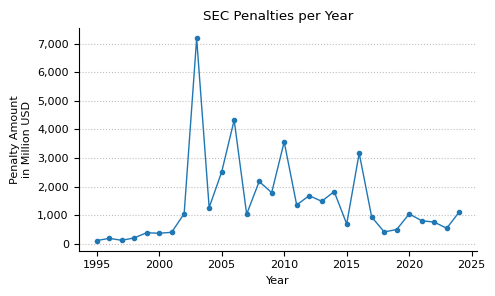

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))

penalties_year.loc[1995:2024]["amount"].plot(
    kind="line",
    ax=ax,
    marker="o",
    markersize=3,
    linewidth=1,
)

# format y labels to , notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set_title("SEC Penalties per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Penalty Amount\nin Million USD")
plt.tight_layout()
plt.grid(axis="x")
ax.set_axisbelow(True)
plt.show()

### Top 10 Penalty Amounts

In [ ]:
# sort all penalties by amount, show top 10
top_10_penalties = all_penalties_df.sort_values("amount", ascending=False).head(10)
top_10_penalties["amount"] = round(top_10_penalties["amount"] / 1_000_000, 2)
top_10_penalties["amount"] = top_10_penalties["amount"].map("{:,.1f}".format)
print("Top 10 SEC Penalties in Million USD between 1995 and 2024")
# show all columns in full width
pd.set_option("display.max_colwidth", None)
top_10_penalties[['amount', 'imposedOn', 'releasedAt', 'releaseNo', 'url']]

Top 10 SEC Penalties in Million USD between 1995 and 2024


,amount,imposedOn,releasedAt,releaseNo,url
6846,"2,250.0","WorldCom, Inc.",2003-08-07 14:21:04-04:00,LR-18277,https://www.sec.gov/enforcement-litigation/litigation-releases/lr-18277
5887,"1,600.0","American International Group, Inc.",2006-02-09 14:22:14-05:00,LR-19560,https://www.sec.gov/enforcement-litigation/litigation-releases/lr-19560
6974,"1,510.0",WorldCom Inc.,2003-05-19 14:20:57-04:00,LR-18147,https://www.sec.gov/enforcement-litigation/litigation-releases/lr-18147
2056,957.0,Braskem S.A.,2016-12-21 14:26:01-05:00,LR-23705,https://www.sec.gov/enforcement-litigation/litigation-releases/lr-23705
6731,894.0,"ten firms, Grubman and Blodget",2003-10-31 14:21:13-05:00,LR-18438,https://www.sec.gov/enforcement-litigation/litigation-releases/lr-18438
2502,806.2,Marlon Quan and the other defendants,2014-09-25 14:25:28-04:00,LR-23093,https://www.sec.gov/enforcement-litigation/litigation-releases/lr-23093
5888,800.0,"American International Group, Inc.",2006-02-09 14:22:14-05:00,LR-19560,https://www.sec.gov/enforcement-litigation/litigation-releases/lr-19560
2058,632.0,Braskem S.A.,2016-12-21 14:26:01-05:00,LR-23705,https://www.sec.gov/enforcement-litigation/litigation-releases/lr-23705
1012,601.0,CR Intrinsic and the relief defendants,2021-02-03 14:27:14-05:00,LR-25022,https://www.sec.gov/enforcement-litigation/litigation-releases/lr-25022
4626,569.0,Siemens Aktiengesellschaft,2008-12-15 14:23:23-05:00,LR-20829,https://www.sec.gov/enforcement-litigation/litigation-releases/lr-20829


In [ ]:
# reset display options
pd.reset_option("display.max_colwidth")

### Penalties by Type of Defendant

In [ ]:
# create piv table across years and imposedOnType, with values = sum of penalties
penalties_entity_type = all_penalties_df.pivot_table(
    index="releasedAtYear",
    columns="imposedOnType",
    values="amount",
    aggfunc="sum",
    fill_value=0,
)

total_col = penalties_entity_type.sum(axis=1)
mean_col = round(penalties_entity_type.mean(axis=1), 0)
median_col = round(penalties_entity_type.median(axis=1), 0)

total_row = penalties_entity_type.sum(axis=0)
mean_row = round(penalties_entity_type.mean(axis=0), 0)
median_row = round(penalties_entity_type.median(axis=0), 0)

penalties_entity_type.loc["total"] = total_row
penalties_entity_type.loc["mean"] = mean_row
penalties_entity_type.loc["median"] = median_row

# format to million and , notation
penalties_entity_type = round(penalties_entity_type / 1_000_000, 2)
penalties_entity_type = penalties_entity_type.map("{:,.1f}".format)

print("SEC Penalties in Million USD by Year and Entity Type")

penalties_entity_type = penalties_entity_type[['company', 'individual']]
penalties_entity_type

SEC Penalties in Million USD by Year and Entity Type


imposedOnType,company,individual
releasedAtYear,,
1995,32.4,53.1
1996,37.4,58.8
1997,21.2,93.3
1998,36.6,71.4
1999,173.0,186.1
2000,44.2,259.9
2001,122.8,236.4
2002,284.8,680.6
2003,"5,197.4","1,043.4"


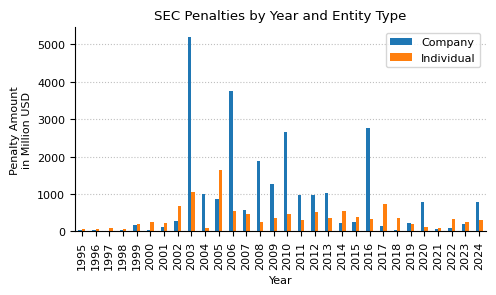

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))

data_to_plot = penalties_entity_type.loc[1995:2024].map(
    lambda x: float(x.replace(",", ""))
)

data_to_plot.plot(kind="bar", stacked=False, ax=ax, color=["#1f77b4", "#ff7f0e"])

plt.title("SEC Penalties by Year and Entity Type")
plt.xlabel("Year")
plt.ylabel("Penalty Amount\nin Million USD")
plt.legend(["Company", "Individual"], loc="upper right")
plt.grid(axis="x")
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()

## Litigations by Category

In [ ]:
all_tags = []

for i, row in df.iterrows():
    tags = row["tags"]
    if isinstance(tags, list):
      all_tags.extend(tags)

all_tags = pd.Series(all_tags)
all_tags = all_tags.value_counts().reset_index()
all_tags.columns = ["tag", "count"]

print("Top 10 Tags in SEC Litigation Releases")
all_tags.head(10)

Top 10 Tags in SEC Litigation Releases


,tag,count
0,disclosure fraud,5875
1,securities fraud,3389
2,insider trading,1900
3,fraud,1454
4,ponzi scheme,932
5,accounting fraud,676
6,unregistered securities,656
7,misappropriation,474
8,investment fraud,404
9,securities violation,312


## Requested Reliefs by Category

In [ ]:
# count all unique requestedRelief
all_requested_relief = []

for i, row in df.iterrows():
    requestedRelief = row["requestedRelief"]
    if isinstance(requestedRelief, list):
        all_requested_relief.extend(requestedRelief)

all_requested_relief = pd.Series(all_requested_relief)
all_requested_relief = all_requested_relief.value_counts().reset_index()

all_requested_relief.columns = ["requestedRelief", "count"]

print("Top 10 Requested Reliefs in SEC Litigation Releases")
all_requested_relief.head(10)

Top 10 Requested Reliefs in SEC Litigation Releases


,requestedRelief,count
0,permanent injunctions,6522
1,civil penalties,5632
2,disgorgement of profits,3931
3,permanent injunction,1274
4,prejudgment interest,1185
5,disgorgement of ill-gotten gains,979
6,disgorgement,911
7,asset freeze,576
8,civil money penalties,401
9,permanent injunctive relief,390


## Violated Securities Laws

In [ ]:
# count all unique violatedSections
all_violated_sections = []

for i, row in df.iterrows():
    violatedSections = row["violatedSections"]
    if isinstance(violatedSections, list):
        all_violated_sections.extend(violatedSections)

all_violated_sections = pd.Series(all_violated_sections)
all_violated_sections = all_violated_sections.value_counts().reset_index()

all_violated_sections.columns = ["violatedSections", "count"]

print("Top 10 Violated Securities Laws in SEC Litigation Releases")
all_violated_sections.head(10)

Top 10 Violated Securities Laws in SEC Litigation Releases


,violatedSections,count
0,Rule 10b-5,6185
1,Section 10(b) of the Securities Exchange Act o...,5684
2,Section 17(a) of the Securities Act of 1933,3827
3,"Sections 5(a), 5(c) and 17(a) of the Securitie...",690
4,Sections 206(1) and 206(2) of the Investment A...,523
5,"Sections 5(a), 5(c), and 17(a) of the Securiti...",469
6,Section 15(a) of the Exchange Act,410
7,Section 17(a) of the Securities Act,402
8,Sections 10(b) and 13(b)(5) of the Securities ...,311
9,Sections 5(a) and 5(c) of the Securities Act o...,309


## Persons & Agencies Conducting the Investigations

In [ ]:
all_investigation_conducted_by = []

for i, row in df.iterrows():
    investigationConductedBy = row["investigationConductedBy"]
    if isinstance(investigationConductedBy, list):
        all_investigation_conducted_by.extend(investigationConductedBy)

all_investigation_conducted_by = pd.Series(all_investigation_conducted_by)
all_investigation_conducted_by = all_investigation_conducted_by.value_counts().reset_index()

all_investigation_conducted_by.columns = ["investigationConductedBy", "count"]

print("Top 10 Investigation Conducted By in SEC Litigation Releases")
all_investigation_conducted_by.head(10)

Top 10 Investigation Conducted By in SEC Litigation Releases


,investigationConductedBy,count
0,Securities and Exchange Commission,437
1,Division of Enforcement,256
2,U.S. Securities and Exchange Commission,161
3,SEC,103
4,John Rymas,83
5,Amy Gwiazda,81
6,New York Regional Office,72
7,Federal Bureau of Investigation,61
8,Boston Regional Office,59
9,Miami Regional Office,55


## Other Agencies Involved

In [ ]:
# count unique otherAgenciesInvolved
all_other_agencies_involved = []

for i, row in df.iterrows():
    otherAgenciesInvolved = row["otherAgenciesInvolved"]
    if isinstance(otherAgenciesInvolved, list):
        all_other_agencies_involved.extend(otherAgenciesInvolved)

all_other_agencies_involved = pd.DataFrame(all_other_agencies_involved)
all_other_agencies_involved = all_other_agencies_involved['name'].value_counts().reset_index()

all_other_agencies_involved.columns = ["otherAgenciesInvolved", "count"]

print("Top 10 Other Agencies Involved in SEC Litigation Releases")
all_other_agencies_involved.head(10)

Top 10 Other Agencies Involved in SEC Litigation Releases


,otherAgenciesInvolved,count
0,Federal Bureau of Investigation,1172
1,Financial Industry Regulatory Authority,552
2,British Columbia Securities Commission,98
3,Ontario Securities Commission,82
4,Options Regulatory Surveillance Authority,78
5,Texas State Securities Board,77
6,New York Stock Exchange,77
7,Internal Revenue Service,71
8,U.S. Attorney's Office for the Southern Distri...,71
9,U.S. Postal Inspection Service,69
